In [6]:
# data import

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
suministrosindustriales=pd.read_csv('data\suministrosindustriales.csv')

In [3]:
suministrosindustriales.head()

,N°,Zona,Un.lect.,Contrato,Tp.tarifa,Instalacion,Fact.cálculo,Equipo,Número de serie,Fabricante,...,sep.-22,oct.-22,nov.-22,Prioridad,Promedio,% Variacion,Tendencia,Grafico,Ordenes,Observacion
0,1131,ST,ST_78_03,504832401.0,G_GMH,30323809.0,160.0,1.000001e+11,115316.0,SIEMENS,...,"30,032","21,680","21,680",Media,"16,481",101.38%,-,NaN,NaN,NaN
1,947,ST,ST_78_14,207043801.0,G_GMH,30104871.0,60.0,1.000000e+11,202.0,SCHLUMBERGER,...,0,0,0,Baja,"5,245",199.64%,-,NaN,NaN,NaN
2,1167,ST,ST_78_13,515750101.0,G_GMH,30369130.0,160.0,1.000002e+11,182971.0,LANDIS + GYR,...,"1,536",336,336,Media,"20,403",82.15%,-,NaN,NaN,NaN
3,602,SS,SS_07_06,101263601.0,G_GMH,30035303.0,120.0,1.000003e+11,479287.0,SIEMENS,...,"6,408","5,904","5,904",Baja,"4,346",42.12%,-,NaN,NaN,NaN
4,484,SS,SS_78_11,502594901.0,G_GMH,30206065.0,120.0,1.000000e+11,106418.0,SIEMENS,...,"46,644","44,280","44,280",Alta,"51,534",13.82%,-,NaN,NaN,NaN


In [10]:
suministrosindustriales.columns

Index(['N°', 'Zona', 'Un.lect.', 'Contrato', 'Tp.tarifa', 'Instalacion',
       'Fact.cálculo', 'Equipo', 'Número de serie', 'Fabricante',
       'Denomin.tipo', 'DS', '¿Telesgestionada?', 'Tipo de medicion', 'Lista',
       'Municipio', 'Población', 'Distrito', 'Calle', 'ene.-19', 'feb.-19',
       'mar.-19', 'abr.-19', 'may.-19', 'jun.-19', 'jul.-19', 'ago.-19',
       'sep.-19', 'oct.-19', 'nov.-19', 'dic.-19', 'ene.-20', 'feb.-20',
       'mar.-20', 'abr.-20', 'may.-20', 'jun.-20', 'jul.-20', 'ago.-20',
       'sep.-20', 'oct.-20', 'nov.-20', 'dic.-20', 'ene.-21', 'feb.-21',
       'mar.-21', 'abril.-21', 'mayo.-21', 'junio.-21', 'julio.-21',
       'agosto.-21', 'sep.-21', 'oct.-21', 'dic.-21', 'ene.-22', 'feb.-22',
       'mar.-22', 'abr.-22', 'may.-22', 'jun.-22', 'jul.-22', 'ago.-22',
       'sep.-22', 'oct.-22', 'nov.-22', 'Prioridad', 'Promedio', '% Variacion',
       'Tendencia ', 'Grafico ', 'Ordenes', 'Observacion'],
      dtype='object')

In [4]:
suministrosindustriales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 72 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   N°                 1698 non-null   object 
 1   Zona               1697 non-null   object 
 2   Un.lect.           1697 non-null   object 
 3   Contrato           1697 non-null   float64
 4   Tp.tarifa          1697 non-null   object 
 5   Instalacion        1697 non-null   float64
 6   Fact.cálculo       1697 non-null   float64
 7   Equipo             1697 non-null   float64
 8   Número de serie    1697 non-null   float64
 9   Fabricante         1697 non-null   object 
 10  Denomin.tipo       1697 non-null   object 
 11  DS                 1681 non-null   object 
 12  ¿Telesgestionada?  1697 non-null   object 
 13  Tipo de medicion   1697 non-null   object 
 14  Lista              1697 non-null   object 
 15  Municipio          1697 non-null   object 
 16  Población          1697 

array([[<AxesSubplot: title={'center': 'Contrato'}>,
        <AxesSubplot: title={'center': 'Instalacion'}>],
       [<AxesSubplot: title={'center': 'Fact.cálculo'}>,
        <AxesSubplot: title={'center': 'Equipo'}>],
       [<AxesSubplot: title={'center': 'Número de serie'}>,
        <AxesSubplot: title={'center': 'Grafico '}>]], dtype=object)

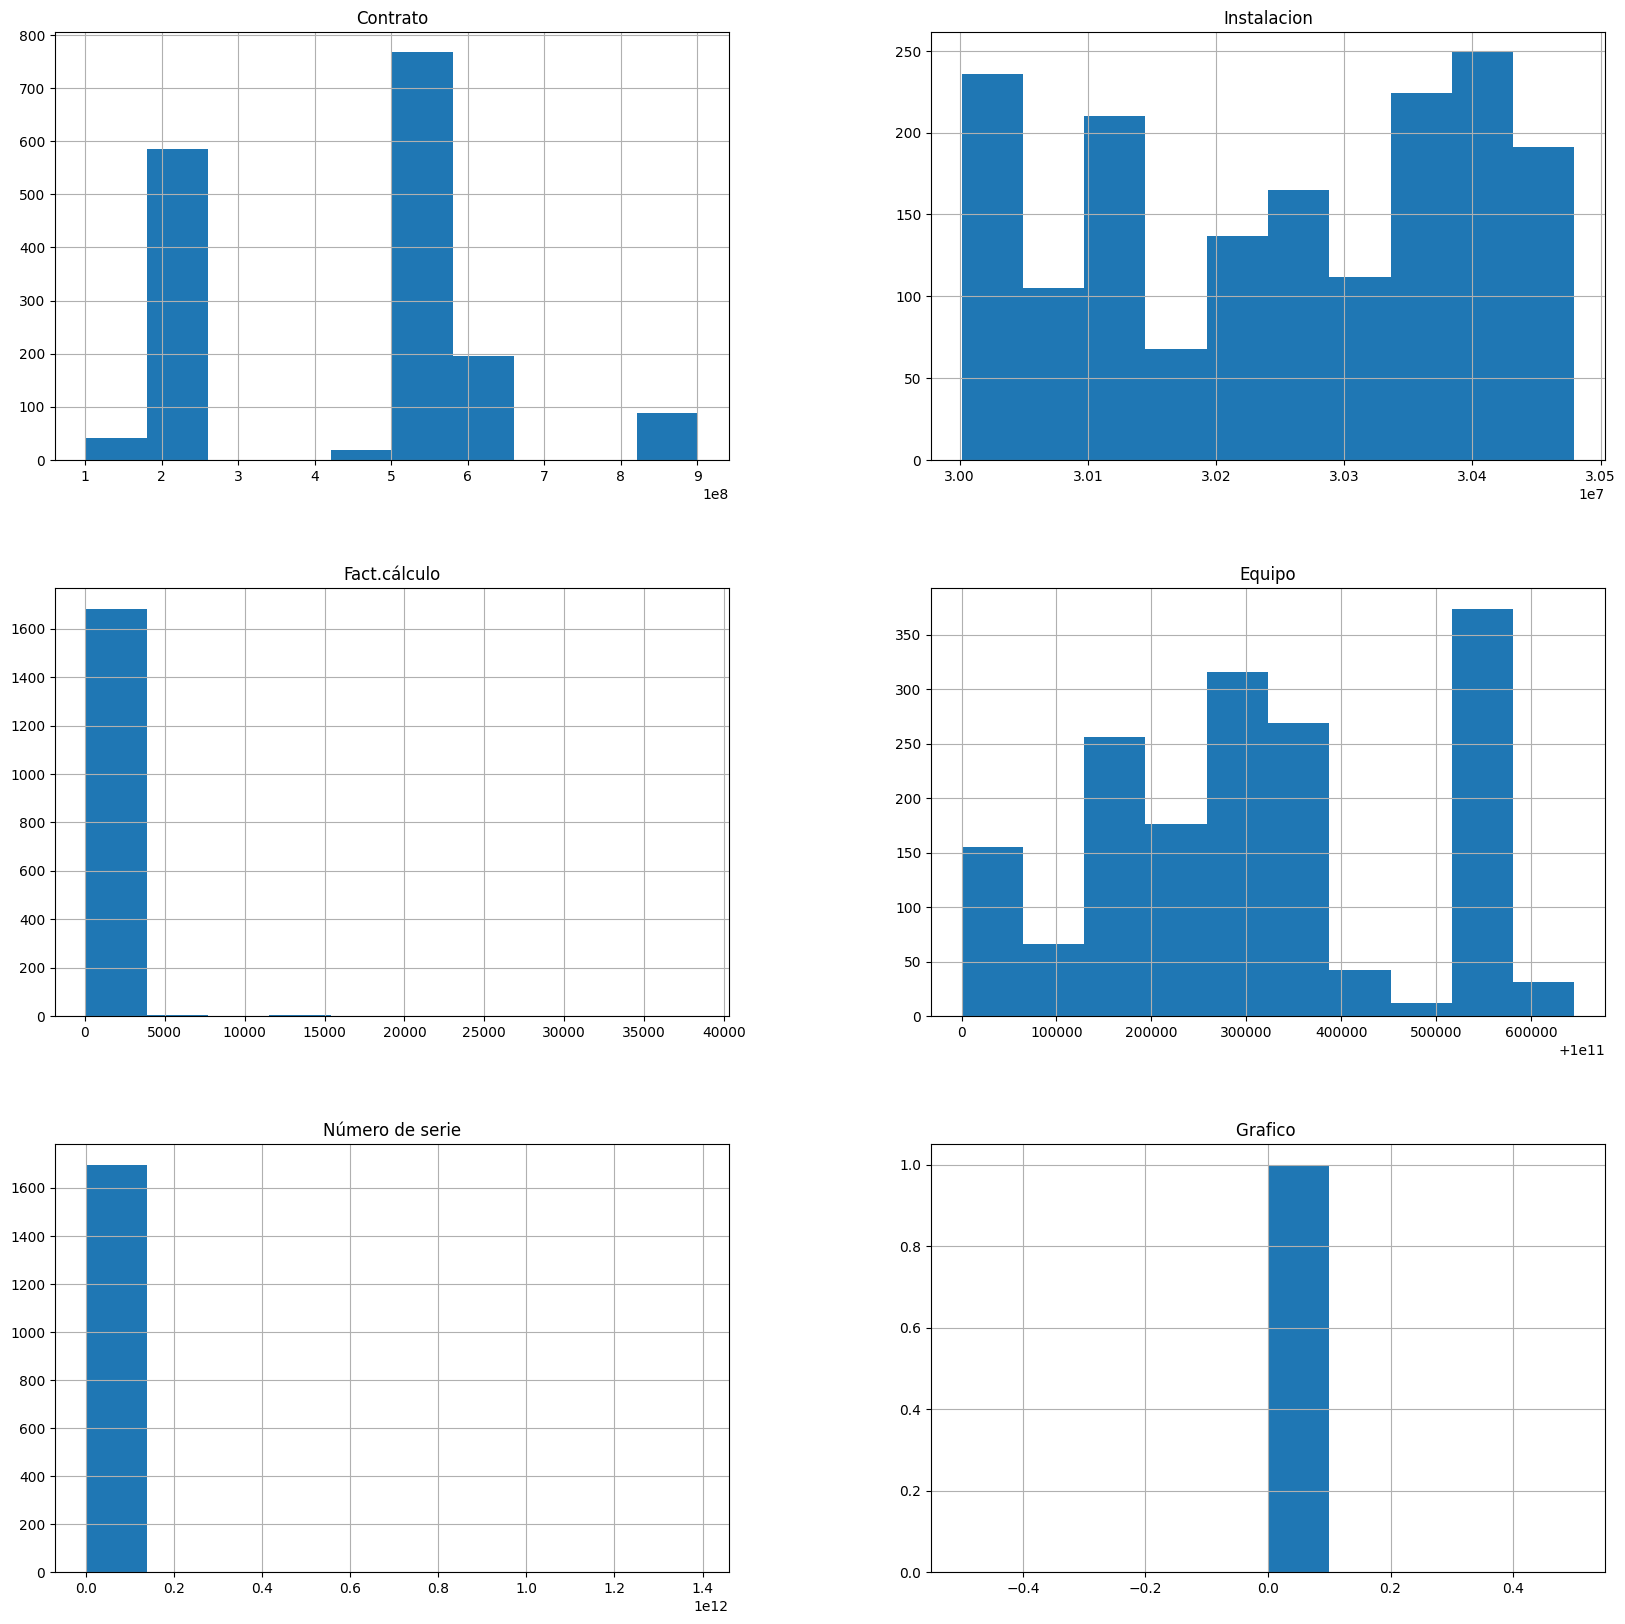

In [13]:
suministrosindustriales.hist(figsize=(20,20))

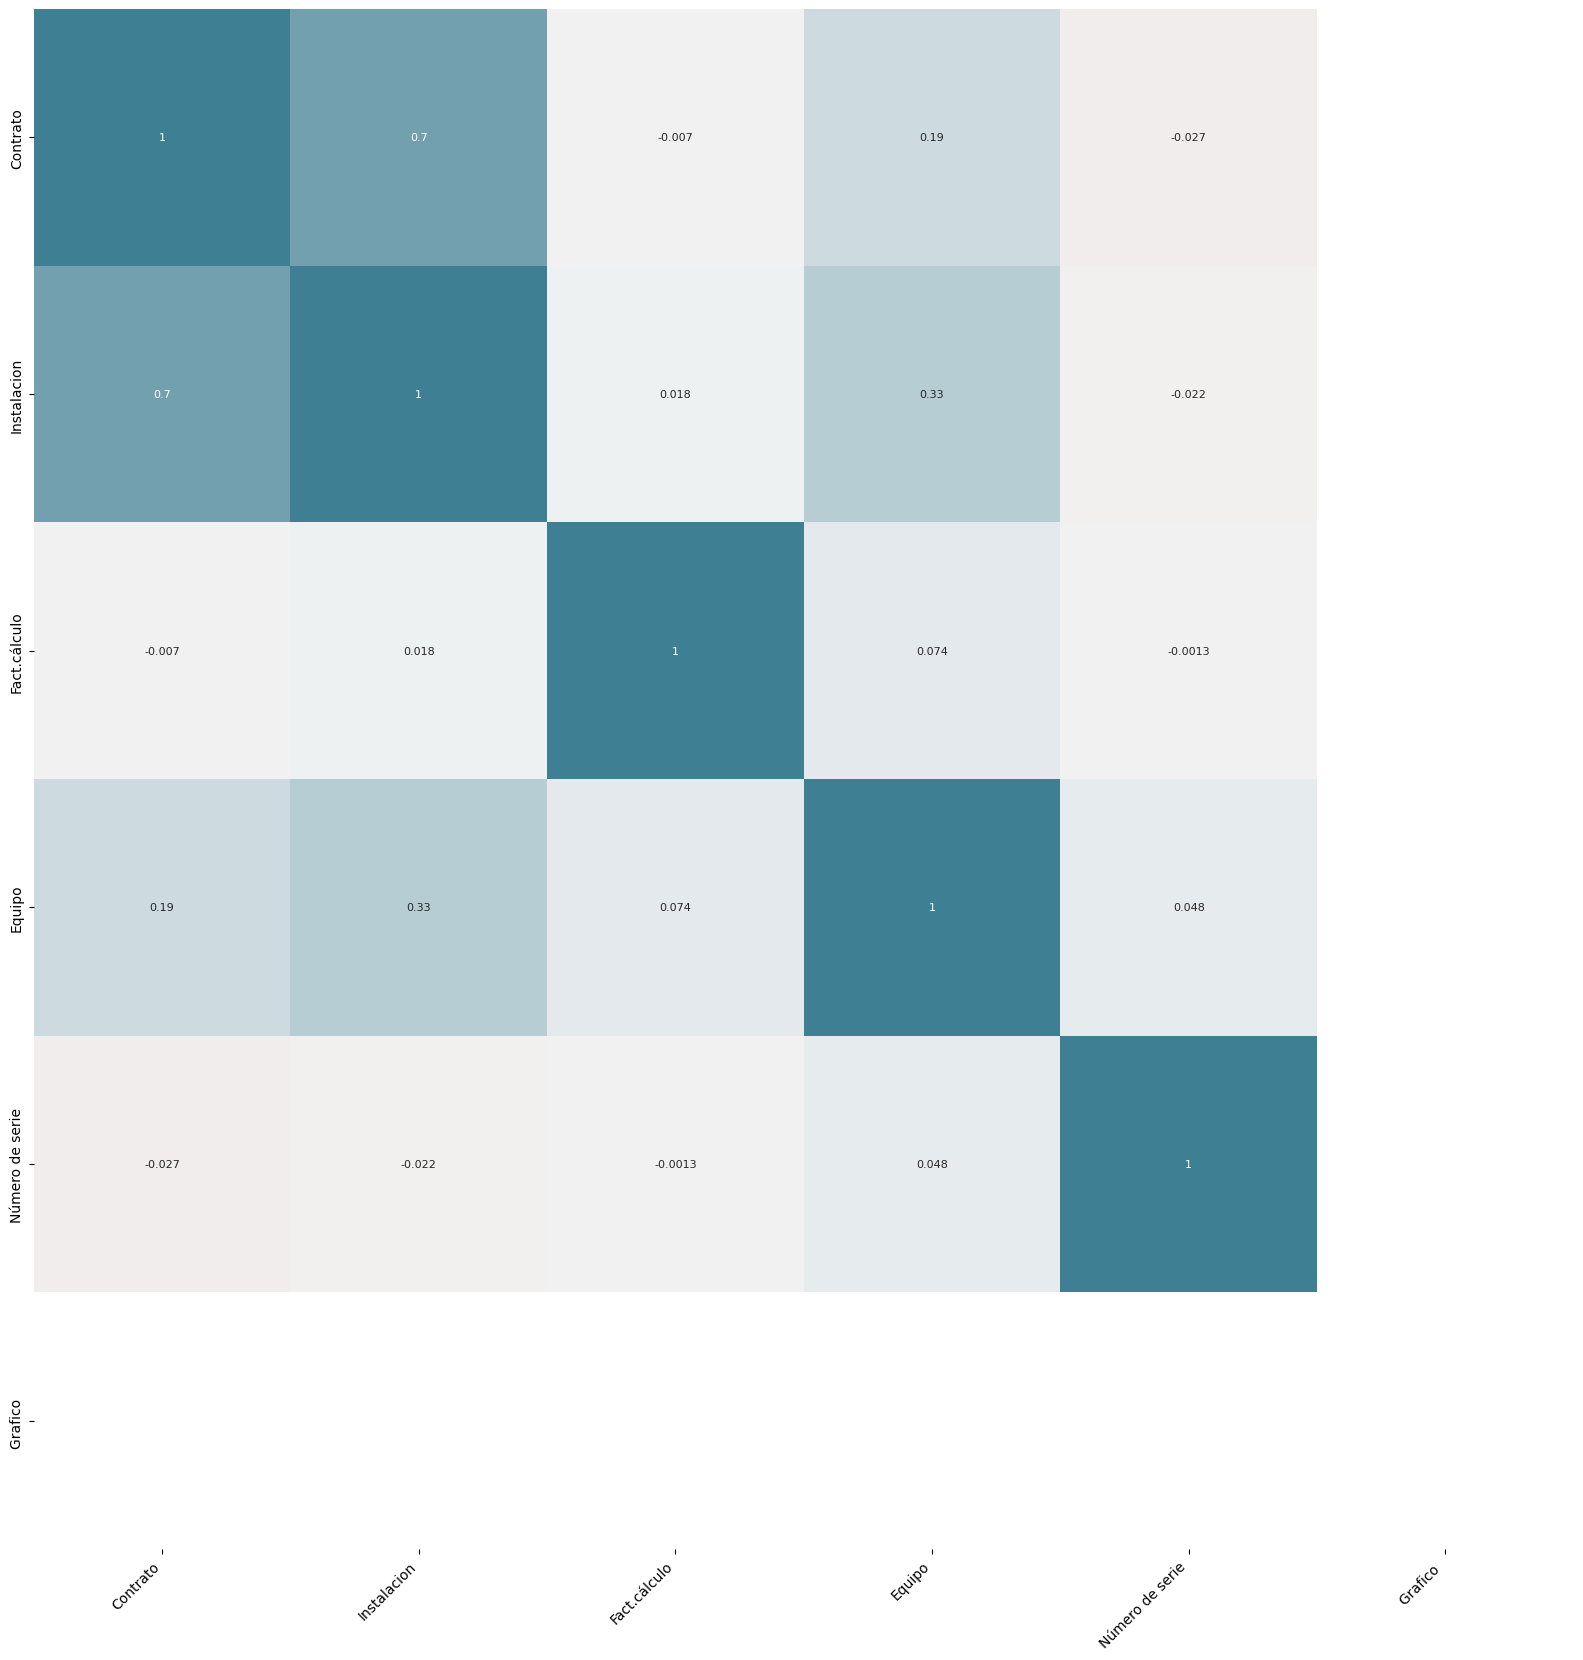

In [7]:
# MATRIZ DE CORRELLACION DE VARIABLES

# encontrar correlAacciones matematicas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
corr_matrix =suministrosindustriales.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)


In [12]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = suministrosindustriales.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,Contrato,Instalacion,0.701475,0.701475
5,Instalacion,Contrato,0.701475,0.701475
16,Equipo,Instalacion,0.325203,0.325203
8,Instalacion,Equipo,0.325203,0.325203
15,Equipo,Contrato,0.191046,0.191046
3,Contrato,Equipo,0.191046,0.191046
17,Equipo,Fact.cálculo,0.073566,0.073566
13,Fact.cálculo,Equipo,0.073566,0.073566
19,Equipo,Número de serie,0.047687,0.047687
23,Número de serie,Equipo,0.047687,0.047687
